In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt





In [64]:
data = {
    'Weight': [79, 69, 73, 95, 82, 55, 69, 71, 64, 69],
    'Height': [1.80, 1.68, 1.82, 1.70, 1.87, 1.55, 1.50, 1.78, 1.67, 1.64],
    'Age': [35, 39, 25, 60, 27, 18, 89, 42, 16, 52],
    'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female']
}

df = pd.DataFrame(data)
df.head()

,Weight,Height,Age,Gender
0,79,1.80,35,Male
1,69,1.68,39,Male
2,73,1.82,25,Male
3,95,1.70,60,Male
4,82,1.87,27,Male


In [65]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

X = df[['Height', 'Age', 'Gender']]
y = df['Weight']


In [66]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)


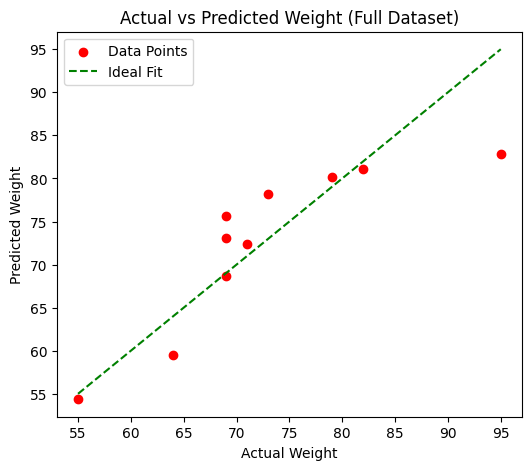

In [67]:
plt.figure(figsize=(6, 5))
plt.scatter(y, y_pred, color='red', label='Data Points')
plt.plot([min(y), max(y)], [min(y), max(y)], 'g--', label='Ideal Fit')
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted Weight (Full Dataset)")
plt.legend()
plt.show()


In [68]:
print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"  {feature}: {coef:.3f}")

sample_person = pd.DataFrame([[1.75, 30, 1]], columns=['Height', 'Age', 'Gender'])  # 1.75m, 30yr, Male
predicted_weight = model.predict(sample_person)
print(f"\nPredicted weight for a 1.75m, 30yr old Male: {predicted_weight[0]:.2f} kg")


Intercept: -24.409654689598213
Coefficients:
  Height: 47.379
  Age: 0.297
  Gender: 8.922

Predicted weight for a 1.75m, 30yr old Male: 76.33 kg


In [69]:
r2 = r2_score(y, y_pred)

mse = mean_squared_error(y, y_pred)

rmse = sqrt(mse)

print("Model Performance on Full Dataset:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f} kg")


Model Performance on Full Dataset:
R² Score: 0.7535
MSE: 26.0354
RMSE: 5.1025 kg
